In [1]:
# Load the Drive helper and mount
from google.colab import drive

#----------------------------------------------------------
# Enter your authorization code:
# 4/1AY0e-g7Fiz3h1_flJA0jGHgPyWZVvCAQ6EYi0x5RLjp-NESKMfuK0YyRSno
#----------------------------------------------------------

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -U mxnet-cu101==1.7.0

     |███████████████████████████████▌| 834.1MB 1.3MB/s eta 0:00:10tcmalloc: large alloc 1147494400 bytes == 0x65e1e000 @  0x7fdace8f3615 0x591e47 0x4cc179 0x4cc2db 0x50a1cc 0x50beb4 0x507be4 0x509900 0x50a2fd 0x50beb4 0x507be4 0x509900 0x50a2fd 0x50cc96 0x58e683 0x50c127 0x58e683 0x50c127 0x58e683 0x50c127 0x58e683 0x50c127 0x5095c8 0x50a2fd 0x50beb4 0x507be4 0x509900 0x50a2fd 0x50beb4 0x5095c8 0x50a2fd
     |████████████████████████████████| 846.0MB 22kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [3]:
!pip install gluoncv

     |████████████████████████████████| 1.0MB 15.8MB/s 
     |████████████████████████████████| 317kB 55.1MB/s 
     |████████████████████████████████| 256kB 47.1MB/s 
     |████████████████████████████████| 11.8MB 58.9MB/s 
     |████████████████████████████████| 972kB 46.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 215kB 57.4MB/s 
     |████████████████████████████████| 675kB 57.6MB/s 
     |████████████████████████████████| 102kB 16.3MB/s 
     |████████████████████████████████| 133kB 61.9MB/s 
     |████████████████████████████████| 962kB 51.3MB/s 
     |████████████████████████████████| 2.6MB 45.4MB/s 
     |████████████████████████████████| 71kB 12.3MB/s 
     |████████████████████████████████| 7.2MB 48.1MB/s 
     |████████████████████████████████| 71kB 12.0MB/s 
     |████████████████████████████████| 102kB 15.0MB/s 
  Created wheel for ConfigSpace: fi

In [4]:
import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv
# using cpu
ctx = mx.cpu(0)

%cd /content/drive/MyDrive/Colab_Notebooks/GreenLabs/Segmentation/

/content/drive/MyDrive/Colab_Notebooks/GreenLabs/Segmentation


187 97 3
219 160 3


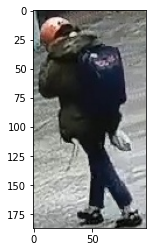

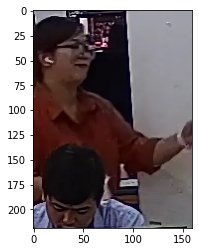

In [21]:
# Load the image
filename = 'obj_0001_030.jpg'
img1 = image.imread(filename)
h1, w1, c1 = img1.shape
print(h1, w1, c1)

filename = 'obj_0251_004.jpg'
img2 = image.imread(filename)
h2, w2, c2 = img2.shape
print(h2, w2, c2)

from matplotlib import pyplot as plt
plt.imshow(img1.asnumpy())
plt.show()
plt.imshow(img2.asnumpy())
plt.show()

In [6]:
def test_transform_in_batch(img_list, ctx):
    transform_fn = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([.485, .456, .406], [.229, .224, .225])
    ])
    imgs = transform_fn(img_list[0])
    for i in range(1,len(img_list)):
      img = transform_fn(img_list[i])
      imgs = mx.ndarray.stack(imgs, img, axis=0)
    return imgs.as_in_context(ctx)

In [14]:
height = 256
width = 128

resized1 = 

img_list = [img1, img2]

imgs = test_transform_in_batch(img_list, ctx)
print(imgs.shape)

(2, 3, 187, 97)


In [8]:
# Load the pre-trained model and make prediction
model_names = ['deeplab_resnet101_coco', 'deeplab_resnet101_ade', 'deeplab_resnet101_citys']
model_name = model_names[0]

model = gluoncv.model_zoo.get_model(model_name, pretrained=True, ctx=ctx)

100%|██████████| 221704/221704 [00:04<00:00, 52332.70KB/s]


In [17]:
import time

start = time.time()
# make prediction using single scale
outputs = model.predict(imgs)
# predicts = mx.nd.squeeze(mx.nd.argmax(outputs, 1)).asnumpy()
stop = time.time()
print('Processing time: ', stop-start)

Processing time:  0.056853294372558594


In [18]:
print(outputs.shape)

(2, 21, 187, 97)


In [10]:
# Add color pallete for visualization
from gluoncv.utils.viz import get_color_pallete
import matplotlib.image as mpimg
for i, predict in enumerate(predicts):
    mask = get_color_pallete(predict, 'ade20k')
    mask.save('output_{}.png'.format(i))

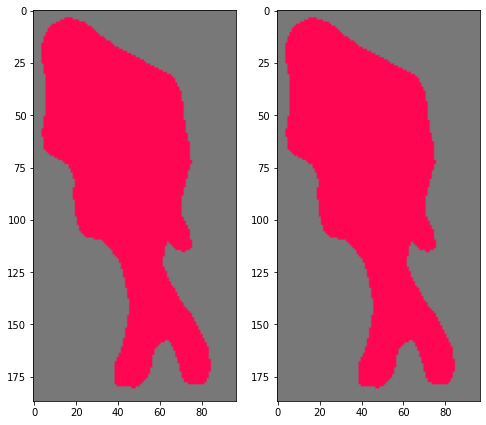

In [11]:
# import matplotlib.image as mpimg
from matplotlib import pyplot as plt

# show the predicted mask
n_preds = len(predicts)

fig = plt.figure(figsize=(8, 8))
columns = 2
rows = max(1, int(n_preds/columns))
for i in range(n_preds):
    mmask = mpimg.imread('output_{}.png'.format(i))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(mmask)
plt.show()


In [ ]:
print('Finished')

Finished
